In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform, MinMaxScaler, StandardScaler,scale, Normalizer
from scipy import stats
from sklearn.decomposition import PCA


In [9]:
data = pd.read_excel("HW_Data_Set.xlsx")
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [10]:
desc_df = data.describe().T
null_count = data.isnull().sum()
null_percent = (data.isnull().sum() / data.count())*100
variance = data.var()

desc_df["variance"] =  round(variance,3)
desc_df["null_values"] = round(null_count,3)
desc_df["null__rate"] = round(null_percent,3)
desc_df.T

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,...,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,...,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,...,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-14.000000,14.285714,14.285714,-50.000000,40.868503,-45.687212,6.850000,7.260000,7.635000,...,-0.003230,10.700000,-11.700000,-39.000000,0.000000,0.323783,0.379894,-15.350354,-36.208094,-37.695273
50%,0.000000,0.000000,50.000000,50.000000,0.000000,49.549766,-2.817298,10.550000,11.040000,11.270000,...,-0.000053,21.300000,0.000000,-22.000000,0.473684,0.495192,0.487078,0.000000,-34.267756,-35.788391
75%,13.000000,13.000000,85.714286,85.714286,57.142857,58.504375,28.072613,14.950000,15.040000,14.960000,...,0.003414,38.400000,0.000000,-11.000000,1.000000,0.675730,0.601508,15.385945,35.879524,37.521892
max,76.000000,76.000000,100.000000,100.000000,100.000000,84.821848,81.105847,82.900000,54.240000,37.050000,...,0.023340,281.800000,0.000000,0.000000,1.000000,1.000000,0.868534,15.768767,37.038694,38.465649
variance,558.112000,558.100000,1324.125000,1330.645000,3649.927000,148.809000,4662.311000,46.294000,33.479000,24.706000,...,0.000000,692.579000,259.213000,541.564000,0.181000,0.052000,0.023000,220.062000,1194.378000,1357.299000
null_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
num, cat = numeric_categoric_variable(data)

Numeric Column  :
 ['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310'

In [12]:
for i in data.select_dtypes(include=["object"]).columns:
    print(i,": ",data[i].value_counts().count())

ind_109 :  2
ind_420 :  582
ind_422 :  573


In [13]:
## data temizleme

#data["ind_420"] = data["ind_420"].replace("?", np.nan)
#data["ind_422"] = data["ind_422"].replace("?", np.nan)

data = data.drop(["ind_420", "ind_422"], axis=1)

In [14]:
## dummy degisken 

dummy = pd.get_dummies(data["ind_109"])
data_dummy = pd.concat([data, dummy],axis=1)
data_dummy = data_dummy.drop(["ind_109"], axis=1)
data_dummy.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,GREEN,RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,1,0


## Normalization 

In [15]:
## minmax 
scaler = MinMaxScaler()
scaler.fit(data_dummy)
data_minmax = scaler.transform(data_dummy)
data_minmax = pd.DataFrame(data_minmax, columns=data_dummy.columns)
data_minmax.head(3)

/home/asus/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,GREEN,RED
0,0.724638,0.714976,1.0,0.857143,0.571429,0.828604,0.971259,0.277947,0.303537,0.265448,...,0.522158,0.712766,1.0,0.498547,0.787736,0.979937,0.980946,0.980946,1.0,0.0
1,0.748792,0.724638,1.0,0.785714,0.607143,0.854913,0.976297,0.127062,0.313808,0.279663,...,0.464355,0.680851,1.0,0.537088,0.773630,0.980177,0.981186,0.981186,1.0,0.0
2,0.777778,0.748792,1.0,0.714286,0.642857,0.866807,0.978490,0.094075,0.308102,0.281404,...,0.437380,0.680851,1.0,0.615169,0.776441,0.980288,0.981297,0.020107,1.0,0.0


In [16]:
## standard scaler 
scaler2 = StandardScaler()
scaler2.fit(data_dummy)
data_stdscaler = scaler2.transform(data_dummy)
data_stdscaler = pd.DataFrame(data_stdscaler, columns=data_dummy.columns)
data_stdscaler.head(3)

/home/asus/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/asus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,GREEN,RED
0,0.838318,0.753674,1.41845,1.026044,0.234831,1.875320,1.161562,1.768003,1.010514,-0.008731,...,-2.549585,-1.110172,1.198341,0.001568,1.407132,1.024243,1.115017,1.094311,0.984393,-0.984393
1,1.049980,0.838340,1.41845,0.830215,0.353072,2.032100,1.213674,-0.047253,1.103849,0.089859,...,-2.922284,-1.368019,1.198341,0.170218,1.333540,1.024752,1.115531,1.094811,0.984393,-0.984393
2,1.303976,1.050005,1.41845,0.634387,0.471312,2.102976,1.236362,-0.444111,1.051996,0.101931,...,-3.096210,-1.368019,1.198341,0.511884,1.348207,1.024990,1.115771,-0.915067,0.984393,-0.984393


In [17]:
## Normalizer 
scaler3 = Normalizer()
scaler3.fit(data_dummy)
data_normalizer = scaler3.transform(data_dummy)
data_normalizer = pd.DataFrame(data_normalizer, columns=data_dummy.columns)
data_normalizer.head(3)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,GREEN,RED
0,0.029678,0.026554,0.156202,0.133888,0.022315,0.113033,0.094985,0.037176,0.027523,0.018323,...,-0.077476,-0.084349,0.001562,0.000779,0.001096,0.023642,0.055647,0.057791,0.001562,0.0
1,0.036405,0.028821,0.151689,0.119184,0.032505,0.112668,0.097637,0.017368,0.027547,0.018536,...,-0.084339,-0.091013,0.001517,0.000815,0.001048,0.022971,0.054067,0.056149,0.001517,0.0
2,0.045242,0.036194,0.150808,0.107720,0.043088,0.113318,0.099406,0.013196,0.026934,0.018519,...,-0.088072,-0.090485,0.001508,0.000928,0.001045,0.022843,0.053765,-0.055836,0.001508,0.0


## PCA - Principal Component Analysis

In [18]:
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(X)
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

pca_fon(data_minmax, 0.8).head(3)

pca sonrası değişken sayısı:  12


,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.948655,0.014419,0.836222,-0.252312,0.357747,0.097015,0.122127,0.357271,0.341336,-0.612891,0.272078,0.365713
1,-2.072825,0.006720,0.824477,-0.162782,0.304293,0.107665,0.105419,0.314527,0.359976,-0.606346,0.245963,0.359678
2,-2.099657,0.046124,0.190747,-0.105251,0.316426,0.373355,0.204883,0.283938,0.430772,-0.580109,0.263074,0.348418


In [19]:
pca_x_minmax = pca_fon(data_minmax.drop(["20_target","50_target","90_target"],axis=1), 0.85)
y_20target_minmax = data_minmax["20_target"]
y_50target_minmax = data_minmax["50_target"]
y_90target_minmax = data_minmax["90_target"]

pca_x_stdscale = pca_fon(data_stdscaler.drop(["20_target","50_target","90_target"],axis=1), 0.85)
y_20target_stdscale = data_minmax["20_target"]
y_50target_stdscale = data_minmax["50_target"]
y_90target_stdscale = data_minmax["90_target"]

pca_x_normalizer = pca_fon(data_normalizer.drop(["20_target","50_target","90_target"],axis=1), 0.85)
y_20target_normalizer = data_minmax["20_target"]
y_50target_normalizer = data_minmax["50_target"]
y_90target_normalizer = data_minmax["90_target"]

pca sonrası değişken sayısı:  14
pca sonrası değişken sayısı:  20
pca sonrası değişken sayısı:  5


## Visualization

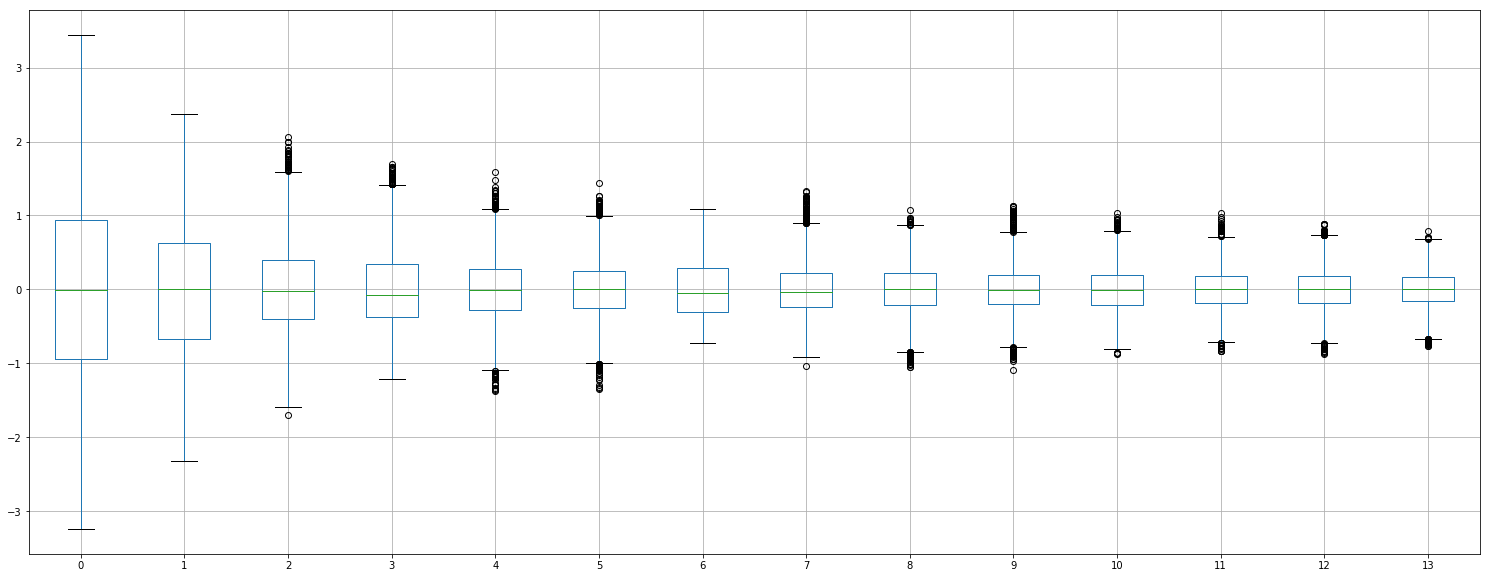

In [20]:
plt.figure(figsize=(26,10))
pca_x_minmax.boxplot()
plt.show()

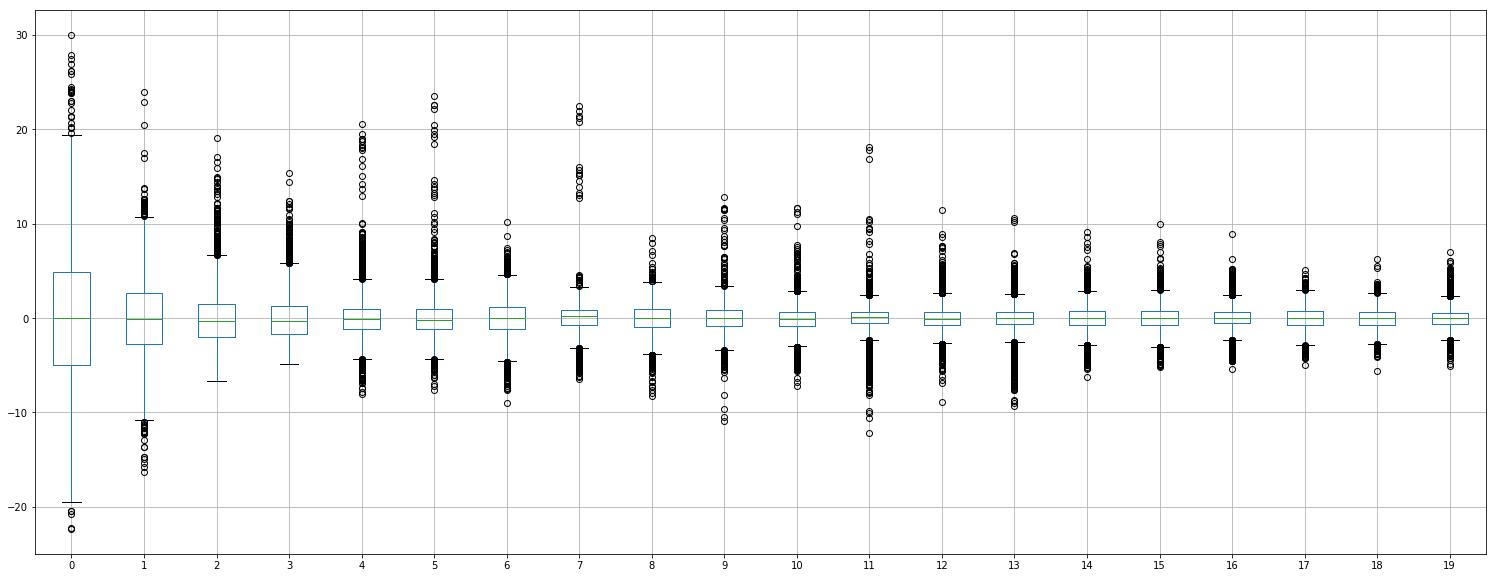

In [21]:
plt.figure(figsize=(26,10))
pca_x_stdscale.boxplot()
plt.show()

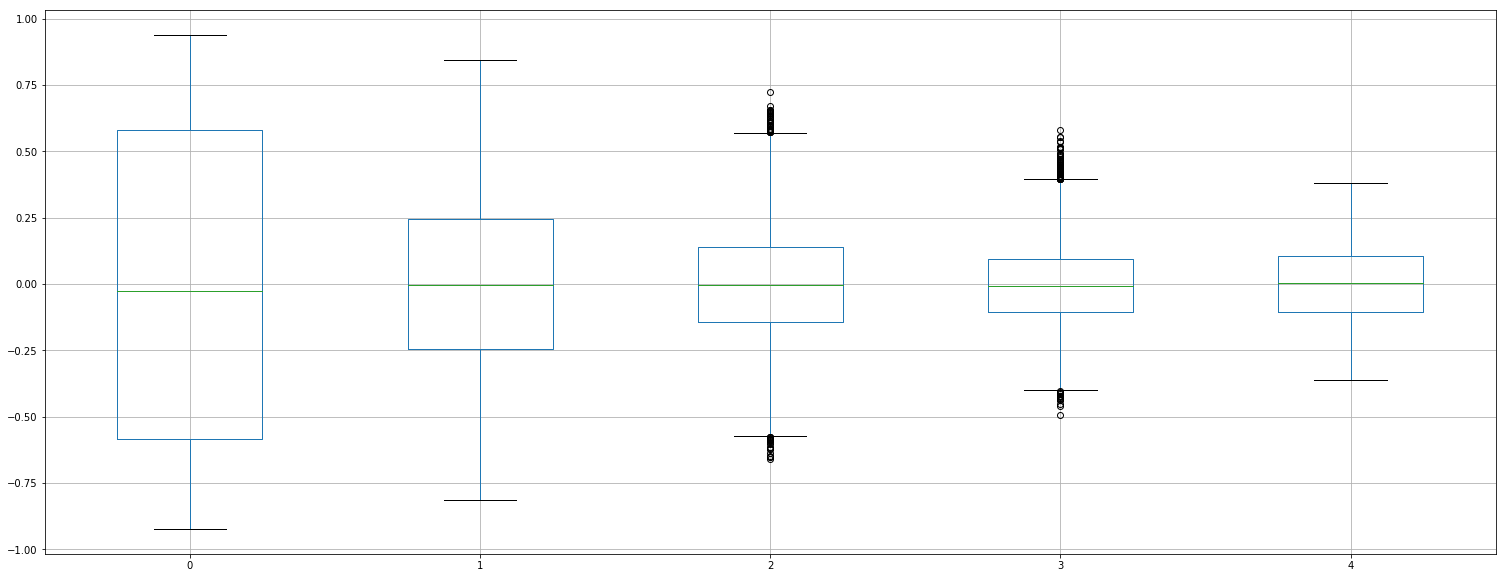

In [22]:
plt.figure(figsize=(26,10))
pca_x_normalizer.boxplot()
plt.show()

## Histogram

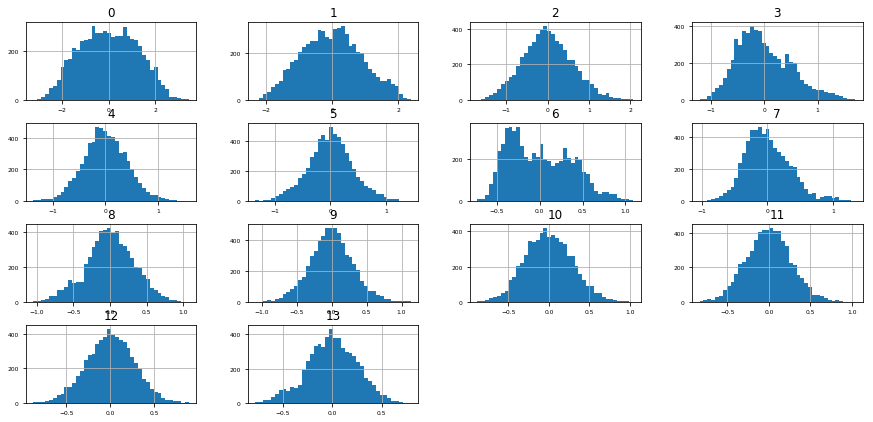

In [24]:
pca_x_minmax.hist(figsize=(15,7), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

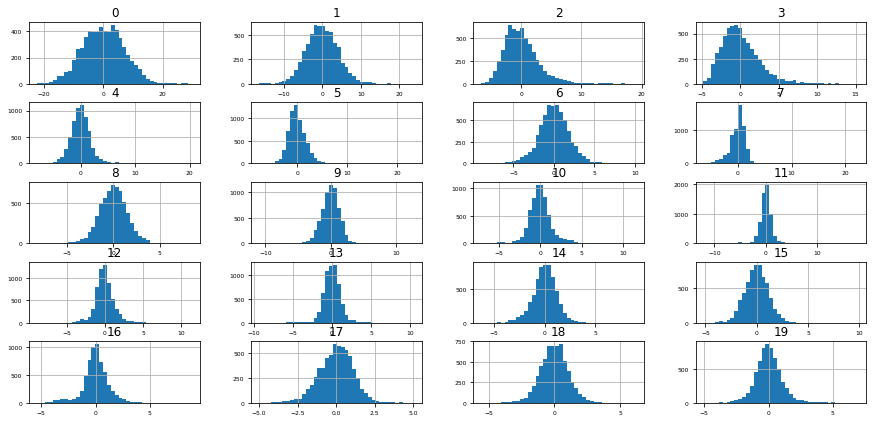

In [25]:
pca_x_stdscale.hist(figsize=(15,7), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

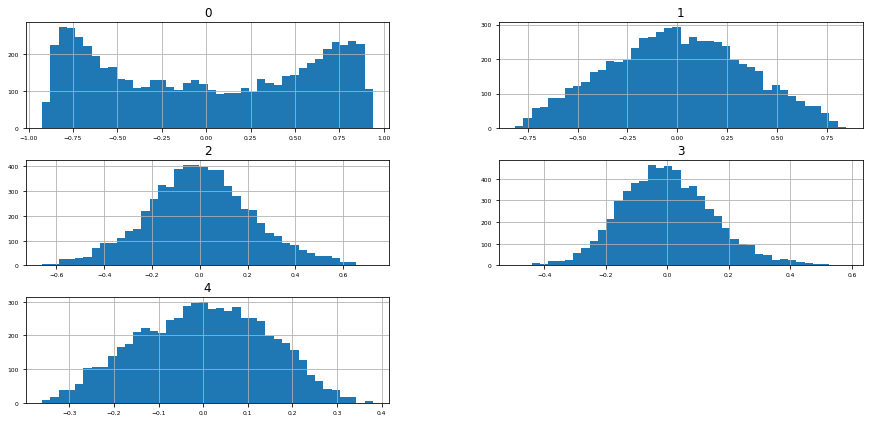

In [26]:
pca_x_normalizer.hist(figsize=(15,7), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

## Shapiro (Normallik) Testi

In [29]:
from scipy.stats import shapiro

stat, p =shapiro(pca_x_normalizer.iloc[:,1:2])
alpha = 0.05
if p > alpha:
    print('Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


/home/asus/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Train-Test Split

In [171]:
# Min-Max Split

xtrain, xtest, ytrain, ytest = train_test_split(pca_x_minmax, y_20target_minmax, test_size=0.25, random_state=0)
xtrain.shape,  ytrain.shape, xtest.shape, ytest.shape

((4625, 14), (4625,), (1542, 14), (1542,))

In [107]:
# Standardizasyon Split

xtrain, xtest, ytrain, ytest = train_test_split(pca_x_stdscale, y_20target_minmax, test_size=0.25, random_state=0)
xtrain.shape,  ytrain.shape, xtest.shape, ytest.shape

((4625, 20), (4625,), (1542, 20), (1542,))

In [30]:
# Normalization Split

xtrain, xtest, ytrain, ytest = train_test_split(pca_x_normalizer, y_20target_minmax, test_size=0.25, random_state=0)
xtrain.shape,  ytrain.shape, xtest.shape, ytest.shape

((4625, 5), (4625,), (1542, 5), (1542,))

## Multiple Linear Regression

In [31]:
lm = sm.OLS(ytrain, np.asarray(xtrain))
model = lm.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              20_target   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.790
Date:                Thu, 06 Aug 2020   Prob (F-statistic):             0.0160
Time:                        18:42:32   Log-Likelihood:                -4779.8
No. Observations:                4625   AIC:                             9570.
Df Residuals:                    4620   BIC:                             9602.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0256      0.017     -1.516      0.1

# Backword Elimination

In [50]:
x_backword = backwardElimination(xtrain.values, ytrain, 0.05)

                            OLS Regression Results                            
Dep. Variable:              20_target   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.535
Date:                Thu, 06 Aug 2020   Prob (F-statistic):             0.0141
Time:                        18:46:06   Log-Likelihood:                -4781.4
No. Observations:                4625   AIC:                             9569.
Df Residuals:                    4622   BIC:                             9588.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0256      0.017     -1.516      0.1

In [53]:
y_pred = model.predict(xtrain)
k_t = pd.DataFrame({"gercek_y":ytrain, "tahmin_y":y_pred})
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t.head()

,gercek_y,tahmin_y,hata,hata_kare
4819,0.030463,0.002434,0.028029,0.000786
3856,0.012222,-0.019945,0.032167,0.001035
3888,0.013677,-0.019006,0.032683,0.001068
242,0.024296,-0.011894,0.036190,0.001310
1507,0.996548,0.027677,0.968871,0.938710


In [54]:
np.sum(k_t["hata_kare"])
np.mean(k_t["hata_kare"])

0.4628621729030684

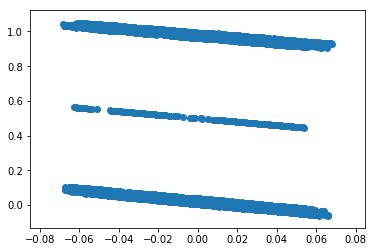

In [55]:
resid = model.resid
plt.scatter(model.predict(), resid)

/home/asus/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


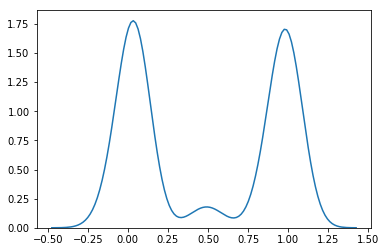

In [134]:
sns.distplot(np.array(model.resid), hist=False)
plt.show()

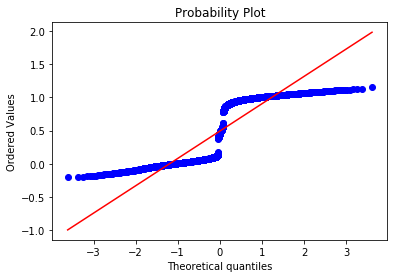

In [135]:
import pylab
stats.probplot(model.resid, dist="norm", plot=pylab)
pylab.show()

In [136]:
from scipy.stats import shapiro

stat, p =shapiro(model.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [137]:
from sklearn.metrics import mean_squared_error, r2_score
print("Train RMSE: ",np.sqrt(mean_squared_error(ytrain, y_pred)))
#print("Test RMSE: ",np.sqrt(mean_squared_error(ytest, model.predict(xtest[xtrain.columns]))))

Train RMSE:  0.6785549100191763


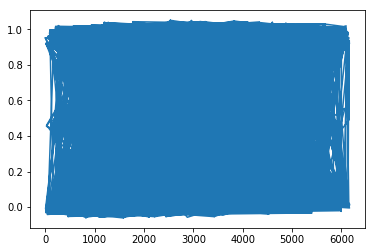

In [56]:
plt.plot(model.resid)
plt.show()